<a href="https://colab.research.google.com/github/nurmuhimawann/CNN-plant-disease-classification/blob/main/Final_Submission_Image_Classification_with_Deployment_MLFE_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Profile** <br>
*Nama: Nur Muhammad Himawan* <br>
*Domisili: Banyuwangi, Jawa Timur* <br>
*E-mail: muhammad.himawan73@gmail.com* <br>
*Path: Machine Learning & Front End Development* <br>
*Progam: Studi Independen Batch 3 - Kampus Merdeka*

# **Proyek Akhir : Image Classification Model Deployment**

Selamat, Anda telah menyelesaikan seluruh materi pada kelas ini. Anda sudah mengenal teknik-teknik lanjutan yang dapat diaplikasikan pada pengembangan model ML. Untuk bisa lulus dari kelas ini, Anda harus mampu mengembangkan model ML untuk klasifikasi gambar kemudian mengkonversi model tersebut ke dalam format berkas TF-Lite yang dapat di embed di Android dan iOS.

**Dataset Preparation**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# API my kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
# source dataset -> https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
! kaggle datasets download vipoooool/new-plant-diseases-dataset

 99% 2.67G/2.70G [00:18<00:00, 145MB/s]
100% 2.70G/2.70G [00:18<00:00, 160MB/s]


In [ ]:
# unzip
! unzip new-plant-diseases-dataset.zip -d /content/data/

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___R

**Load Dataset**

New Plant Diseases Dataset. Image dataset containing different healthy and unhealthy crop leaves. This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes.

In [ ]:
# dataset directory
import os
dir_datasets = '/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
print(os.listdir(dir_datasets))

['Tomato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Tomato___Late_blight', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Potato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Peach___healthy', 'Grape___Esca_(Black_Measles)', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___healthy', 'Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Strawberry___healthy', 'Potato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Apple___Apple_scab', 'Corn_

In [ ]:
# check the amount of data
import glob 
total_img = len(list(glob.iglob('/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*/*.*', recursive=True)))
print("total images: ", total_img)

total images:  70295


**Data Splitting**

In [ ]:
# split data
!pip install split-folders
import splitfolders
splitfolders.ratio(dir_datasets, output='/content/data/output/', seed=1337, ratio=(.8, .2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 70295 files [00:11, 5938.40 files/s]


In [ ]:
# define train, val directory and base directory
base_dir = '/content/data/output/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

**Image Augmentation**

In [ ]:
# image data generator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255 )

In [ ]:
# data augmentation
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 100,
    color_mode = "rgb",
    class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150),
    batch_size = 100,
    color_mode = "rgb",
    class_mode = 'categorical')

Found 56219 images belonging to 38 classes.
Found 14076 images belonging to 38 classes.


In [ ]:
# check class
class_dict = train_set.class_indices
myList = list(class_dict.keys())
myList

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

**Model Development**

In [ ]:
# sequential models
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(38, activation= 'softmax')
])

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:
# see model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# mycallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    accuracy=0.92
    if(logs.get('accuracy')>accuracy and logs.get('val_accuracy')>=accuracy):
      print("\nTarget reached %2.2f%%. Stop Training!!" %(accuracy*100))
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# fitting models
history = model.fit(train_set,
                    epochs=25,
                    steps_per_epoch = train_set.samples // 100,
                    validation_data=validation_set, 
                    validation_steps = validation_set.samples // 100,
                    verbose=1,
                    callbacks = [callbacks])

Epoch 1/25
562/562 [==============================] - 383s 657ms/step - loss: 1.6150 - accuracy: 0.5248 - val_loss: 1.4862 - val_accuracy: 0.6144
Epoch 2/25
562/562 [==============================] - 369s 657ms/step - loss: 0.7119 - accuracy: 0.7751 - val_loss: 1.1274 - val_accuracy: 0.7093
Epoch 3/25
562/562 [==============================] - 372s 661ms/step - loss: 0.4974 - accuracy: 0.8385 - val_loss: 1.0138 - val_accuracy: 0.7436
Epoch 4/25
562/562 [==============================] - 369s 657ms/step - loss: 0.4007 - accuracy: 0.8699 - val_loss: 0.6666 - val_accuracy: 0.8050
Epoch 5/25
562/562 [==============================] - 371s 660ms/step - loss: 0.3391 - accuracy: 0.8887 - val_loss: 0.5870 - val_accuracy: 0.8317
Epoch 6/25
562/562 [==============================] - 366s 651ms/step - loss: 0.2912 - accuracy: 0.9035 - val_loss: 0.5699 - val_accuracy: 0.8466
Epoch 7/25
562/562 [==============================] - 368s 654ms/step - loss: 0.2606 - accuracy: 0.9134 - val_loss: 0.4740 -

**Evaluating Model Performance**

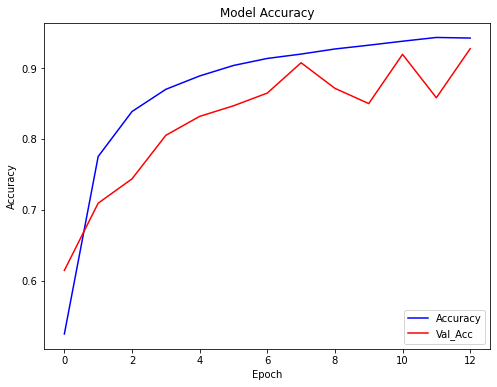

In [ ]:
# plotting accuracy metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

acc = plt.plot(history.history['accuracy'], color='blue')
val_acc = plt.plot(history.history['val_accuracy'], color='red')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Accuracy', 'Val_Acc'], loc='lower right')

plt.show()

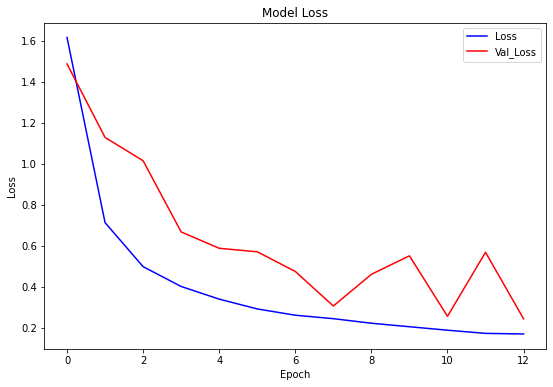

In [ ]:
# plotting loss metrics
plt.figure(figsize=(9,6))

loss = plt.plot(history.history['loss'], color='blue')
val_loss = plt.plot(history.history['val_loss'], color='red')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Loss', 'Val_Loss'], loc='upper right')

plt.show()

**Making Predictions**

Saving test_img.jpg to test_img.jpg


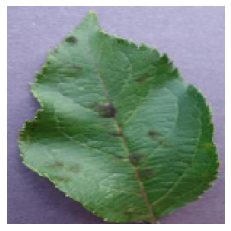

prediction: Apple___Apple_scab


In [ ]:
# predicting images
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import image
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  new_img = image.load_img(path, target_size=(150, 150))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  prediction = model.predict(img)
  
  x = prediction.flatten()
  j = x.max()
  for index, item in enumerate(x):
      if item == j:
          class_name = myList[index] 

  # plot img  
  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  plt.axis('off')
  plt.show()

  print("prediction:", class_name)

**Saving Models**

In [ ]:
# models conversion
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save("models/model_best.hdf5", save_format="h5")

# **Conclusion**

The purpose of developing the model is to classify plant diseases and predict whether the target is infected by one of the common plant diseases or not. This model will take an input image, and classify the image into one of 38 classes. The dataset is open source which can be obtained from the kaggle website.

Based on the evaluation matrix seen from the accuracy graph and loss function, the model made is **good-fit** with an accuracy and val_accuracy of more than **92%**. So, we can use the model to predict a data.

# **Kriteria Penilaian**

Berikut kriteria submission yang harus Anda penuhi:

- Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar. (**done**, I use a dataset of approximately 70 thousand images)
- Dataset tidak pernah digunakan pada submission kelas machine learning sebelumnya. **(done)**
- Dataset dibagi menjadi 80% train set dan 20% test set. **(done)**
- Model harus menggunakan model sequential. **(done)**
- Model harus menggunakan Conv2D Maxpooling Layer. **(done)**
- Akurasi pada training dan validation set minimal sebesar 80%. **(done)**
- Menggunakan Callback. **(done)**
- Membuat plot terhadap akurasi dan loss model. **(done)**
- Menulis kode untuk menyimpan model ke dalam format TF-Lite. **(done)**

Anda dapat menerapkan beberapa saran untuk mendapatkan nilai tinggi, berikut sarannya:

- Dataset yang digunakan berisi lebih dari 2000 gambar. **(done)**
- Mengimplementasikan Callback.**(done)**
- Gambar-gambar pada dataset memiliki resolusi yang tidak seragam. (**done**, but I'm not so sure about this, on the input layer I've used a layer 150 x 150 pixels. each different size, the scale will be adjusted to the dimensions on the layer of the image.)


Detail penilaian submission:

- Bintang 1 : Semua ketentuan terpenuhi, namun terdapat indikasi plagiat yaitu dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.
- Bintang 2 : Semua ketentuan terpenuhi, namun penulisan kode berantakan.
- Bintang 3 : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.
- Bintang 4 : Semua ketentuan terpenuhi, dataset memiliki minimal 2000 sampel gambar dan minimal 3 kelas. Serta akurasi pada training dan validation set minimal 85%.
- Bintang 5 : Semua ketentuan terpenuhi, dataset memiliki minimal 10000 gambar, resolusi gambar pada dataset tidak seragam. Serta akurasi pada training set dan validation set minimal 92%. **(done)**


Beberapa poin yang perlu diperhatikan ketika mengirimkan berkas submission:

- Menggunakan bahasa pemrograman Python. **(done)**
- Mengirimkan pekerjaan Anda dalam bentuk berkas ipynb dan py dalam 1 folder yang telah di zip. **(done)**
- File ipynb yang dikirim telah dijalankan terlebih dahulu sehingga output telah ada tanpa reviewer perlu menjalankan ulang notebook. **(done)**